In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [9]:
#Daten einlesen
with open('EnergiespektrumOffen') as data:
    energie = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('EnergiespektrumOffen') as data:
    count = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

In [12]:
#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt[0], popt[1] , popt[2], popt[3], pcov[2,2], pcov[3,3]

MW: 2.954 pm 0.07192712293670496 SD: 0.99 pm 0.08342520946340376
FWHM: 2.3324


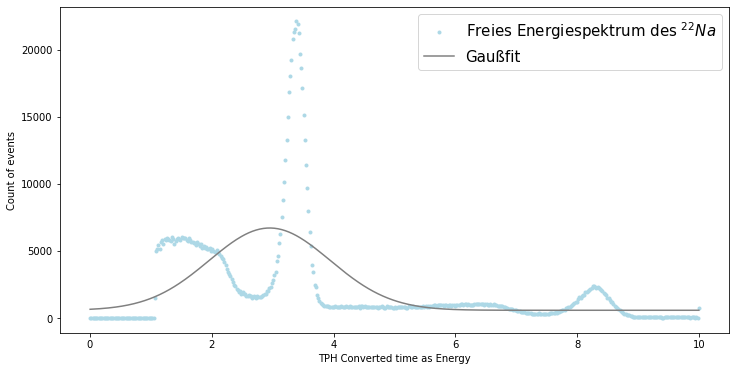

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('TPH Converted time as Energy')
ax.set_ylabel('Count of events')
#Plotten der unskalierten Kurven
ax.plot(energie, count,'o',markersize=3, color = "lightblue",label = "Freies Energiespektrum des $^{22}$Na")

#Gauß
H, A, x, sigma, fehlermü, fehlersd = gauss_fit(energie , count)
print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))

FWHM = round(2.35482 * sigma,4)
print('FWHM:',FWHM)

ax.plot(energie, gauss(energie, H,A,x,sigma), color = "grey", label="Gaußfit")
ax.legend(fontsize=15)
fig.savefig('Peakpositionen.png', dpi=200)